In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
from sys import path
path.insert(0,'../src/')
from glob import glob

from chemulator import Chemulator

---

### Let's work with the top-ten elements in the dataset. And do its benchmarking

We have 10 different models in the dataset and we can choose the 10 with the highest temperature for each model.


In [2]:
#first, to define the path of the emulator and the encoder
autoencoder_dir="../models/autoencoder-2021-release/"
emulator=Chemulator(autoencoder_dir=autoencoder_dir)
emulator.load_model("../models/emulator-2021-release/")

In [3]:
data=pd.read_hdf("example_models.hdf",key="df").reset_index(drop=True)
#data=data.drop_duplicates('gas_temp').sort_values(by=['gas_temp']) #we sort the values by the gas temperature
data=data.drop_duplicates('gas_temp')

In [4]:
tops=[]
for model in data['model'].unique():
    top=data[data['model']==model]
    tops.append(top.sort_values(by=['gas_temp'])[-10:])
#In tops we have the list of the top-10 elements of each model sorted by temperature of the gas

In [5]:
# Now we have to sorted in time order
models_top=[] #esta lista tendra los valores de cada modelo con mayor temperatura
for top in tops:
    models_top.append(top.sort_values(by=['Time'],ascending=True))    
models_top[9]

,model,Time,gas_density,gas_temp,dust_temp,av,radfield,zeta,H,H+,...,MG+,CO+,CO,HCO+,O2,O2+,E-,coldens,h2col,ccol
9005,4951,4000.0,989240.0,101.19,15.02,0.000182,3.222924,1.917344,0.044247,1.050210e-09,...,0.000008,4.953790e-15,0.000010,2.111720e-12,4.834630e-11,4.845780e-16,0.000030,2.892011e+17,8.560156e+14,18560.378653
9006,4951,5000.0,989240.0,101.04,15.02,0.000182,3.222924,1.917344,0.044201,1.032430e-09,...,0.000008,4.844050e-15,0.000012,2.108210e-12,4.934560e-11,5.043260e-16,0.000030,2.892011e+17,8.560156e+14,18560.378653
9007,4951,6000.0,989240.0,101.09,15.02,0.000182,3.222924,1.917344,0.044210,1.034700e-09,...,0.000008,4.755360e-15,0.000014,2.091050e-12,5.072030e-11,5.262240e-16,0.000029,2.892011e+17,8.560156e+14,18560.378653
9011,4951,10000.0,989240.0,101.39,15.02,0.000182,3.222924,1.917344,0.044264,1.055220e-09,...,0.000008,4.469260e-15,0.000019,2.030800e-12,5.677380e-11,6.235740e-16,0.000026,2.892011e+17,8.560156e+14,18560.378653
9017,4951,16000.0,989240.0,101.10,15.02,0.000182,3.222924,1.917344,0.044246,1.057200e-09,...,0.000008,4.153660e-15,0.000025,1.990310e-12,6.594090e-11,7.866030e-16,0.000024,2.892011e+17,8.560156e+14,18560.378653
9022,4951,21000.0,989240.0,101.57,15.02,0.000182,3.222924,1.917344,0.044242,1.061940e-09,...,0.000008,3.971860e-15,0.000028,1.966040e-12,7.370070e-11,9.300030e-16,0.000022,2.892011e+17,8.560156e+14,18560.378653
9026,4951,25000.0,989240.0,101.63,15.02,0.000182,3.222924,1.917344,0.044246,1.066850e-09,...,0.000008,3.862970e-15,0.000030,1.950000e-12,7.967540e-11,1.043150e-15,0.000021,2.892011e+17,8.560156e+14,18560.378653
9044,4951,43000.0,989240.0,101.20,15.02,0.000182,3.222924,1.917344,0.044202,1.059110e-09,...,0.000008,3.590130e-15,0.000035,1.923370e-12,9.939230e-11,1.444310e-15,0.000019,2.892011e+17,8.560156e+14,18560.378653
9099,4951,98000.0,989240.0,101.33,15.02,0.000182,3.222924,1.917344,0.044228,1.069700e-09,...,0.000008,3.461180e-15,0.000037,1.896010e-12,1.140320e-10,1.748350e-15,0.000018,2.892011e+17,8.560156e+14,18560.378653
9746,4951,745000.0,989240.0,101.13,15.02,0.000182,3.222924,1.917344,0.044241,1.074060e-09,...,0.000008,3.457970e-15,0.000037,1.892020e-12,1.147910e-10,1.762060e-15,0.000018,2.892011e+17,8.560156e+14,18560.378653


**Now for the benchmarking we run the chem for every initial condition.**

Notice that, in each model we have differents timesteps. We will evaluate over all the points between the initial and ending points. Then we take those corresponding to each value. 

Now, let's prepare the initial condition and the number of steps: 

In [6]:
index=[0,1000,2001,3873,4001,5002,6992,7002,8003,9005]

In [23]:
#The initial conditions are the first values of every model:
init_cond=[]
steps=[]
n=0
for i in models_top:
    init_cond.append(i.loc[index[n]:index[n]])
    paso=[]
    n=n+1
    for k in range(9):
        paso.append((i['Time'].iloc[k+1]-i['Time'].iloc[k])/1000.0)
    steps.append(paso)
    
#init_cond contine la informacion de cada una de las condiciones iniciales de cada modelo
#steps tiene los valores en los que tenemos que evaluar el modelo para 'atinarle' a los valores que elegimos 
#por tener las temperaturas mas altas

In [8]:
#We prepare the initial conditions
init_cond2=[]
for cond in init_cond:
    init_cond2.append(emulator.prepare_inputs(cond.reset_index(drop=True),learn_scaling=False)
    )

1/1 [==============================] - 0s 21ms/step


In [10]:
init_cond2[0]

,gas_temp,gas_density,radfield,zeta,coldens,h2col,ccol,metallicity,Chem_1,Chem_2,Chem_3,Chem_4,Chem_5,Chem_6,Chem_7,Chem_8
0,0.26824,0.481258,0.156591,0.392139,0.0,0.0,0.0,0.818681,0.018243,0.18437,0.231199,0.313566,0.625941,0.046221,0.114786,0.414637


In [34]:
predictions=[]
n=0
for k in range(len(init_cond)):
    pred=pd.DataFrame() #The empty dataFrame to fill it up with the prediction o each model
    for paso in steps[n]:
        pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
        init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
        init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
    predictions.append(pred)
    n=n+1

1/1 [==============================] - 0s 25ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 27ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 27ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 27ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 33ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 30ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 26ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 32ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 20ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 20ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 26ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 30ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - ETA: 0s

/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 25ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 26ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 26ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 25ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 25ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 27ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_126901/2116632244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


In [43]:
#We save the model predictions for every model
n=0
for j in predictions:
    n=n+1
    j.to_csv(f'top_model{str(n)}.csv') 

In [46]:
plot_specs=["gas_temp","dust_temp","H","H+","H2","C","C+","CO","O","O+","H2O"]
predicted_vals=[]

for i in range(10):
    model=pd.read_csv(f'top_model{str(n)}.csv')
    #model=pd.read_csv(f'pred_model{str(i+1)}.csv')
    model=model.drop('Unnamed: 0',axis=1)
    predicted_vals.append(emulator.recover_real_values(model)[plot_specs])
#predicted_vals=np.array(predicted_vals) #[models,values,variable]

1/1 [==============================] - 0s 22ms/step


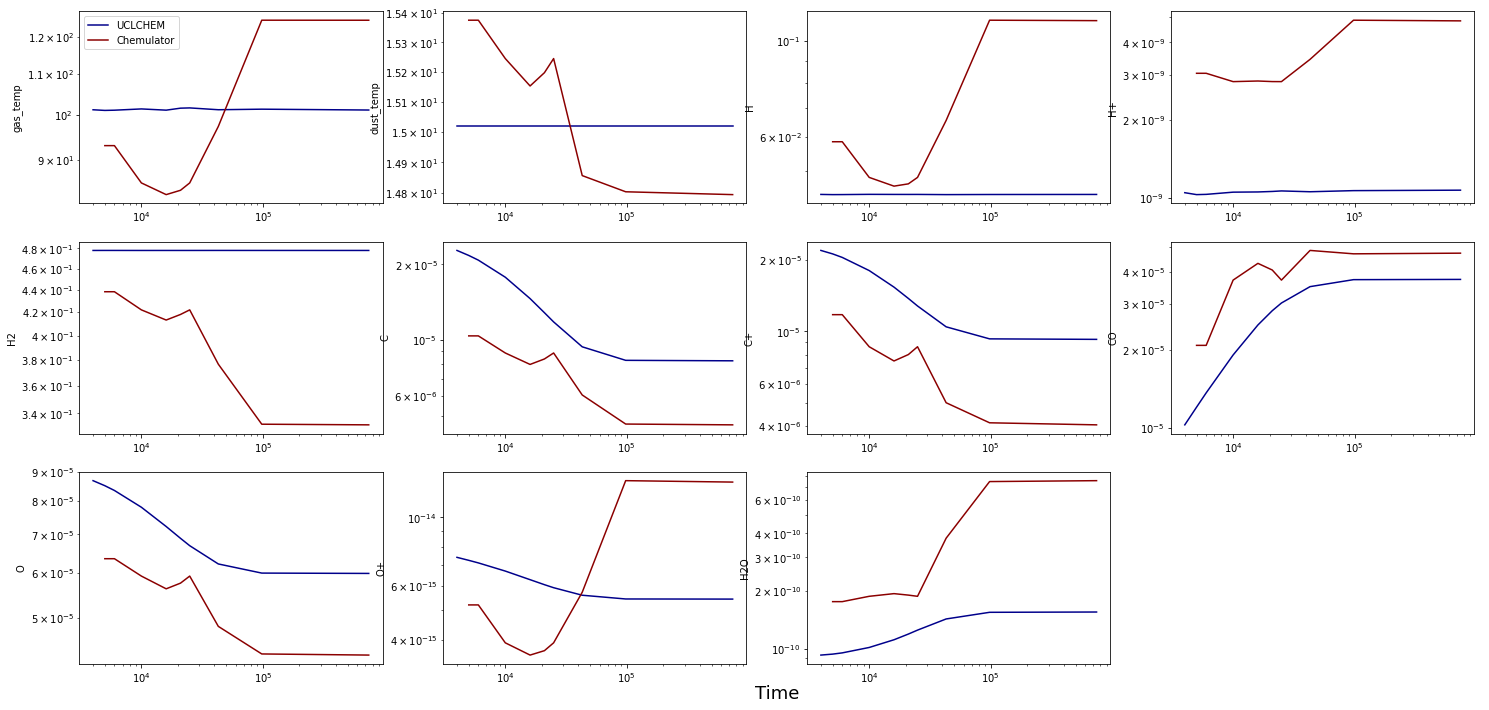

In [109]:
#now the one-vs-one plots
#first set-up the number of plots

m=9 #model

fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Time',size=18)
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#All this is for put the time as common label

for i in range(11):
    ax1 = fig.add_subplot(3,4,i+1)
    ax1.plot(models_top[m]['Time'],models_top[m][plot_specs[i]],label='UCLCHEM', color='darkblue')
    ax1.plot(models_top[m]['Time'][1:],predicted_vals[m][plot_specs[i]],label='Chemulator', color='darkred')
    if i==0:ax1.legend()
    ax1.set(xscale="log",yscale="log",ylabel=plot_specs[i])

**Now lets plot the real vs predicted for every one of the models**

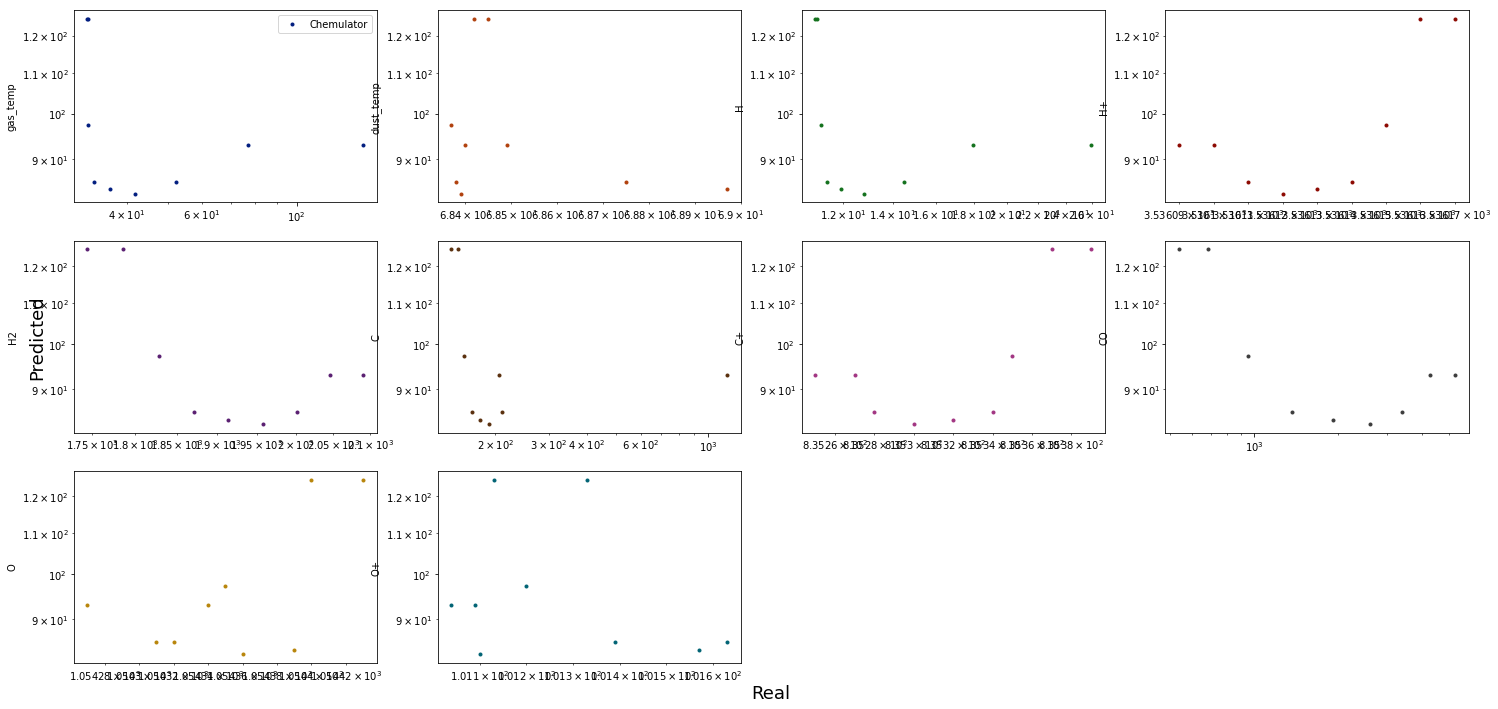

In [181]:
#fig = plt.figure()
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Real',size=18)
ax1.set_ylabel('Predicted',size=18)

ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)



#ax1 = fig.add_subplot(1,1,1)
colors=sns.color_palette("dark",n_colors=10)
#fig = plt.figure(figsize=(25,12))
for i in range(10):
    ax1 = fig.add_subplot(3,4,i+1)
    #ax1.plot(models_top[m]['Time'],models_top[m][plot_specs[i]],label='UCLCHEM', color='darkblue')
    #ax1.plot(models_top[m]['Time'][1:],predicted_vals[m][plot_specs[i]],label='Chemulator', color='darkred')
    ax1.plot(models_top[i][plot_specs[0]][1:],predicted_vals[i][plot_specs[0]],'.'
             ,label='Chemulator', color=colors[i])
    
    if i==0:ax1.legend()
    ax1.set(xscale="log",yscale="log",ylabel=plot_specs[i])

    ###ax1.plot(models_top[i][plot_specs[0]][1:],predicted_vals[i][plot_specs[0]],'.'
             #,label='Chemulator', color=colors[i])
    #ax1.set(xscale="log",yscale="log")#,xlabel="Time",ylabel=plot_specs[i])
    #ax1.plot(np.linspace(1e1,1e4,100),np.linspace(1e1,1e4,100))